In [50]:
import pandas as pd
import numpy as np

from scipy import stats
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [138]:
train_data = pd.read_csv('sales_train_v2.csv')
train_data = train_data.drop('date' , axis = 1) #暂时删除掉具体日期

item_categories = pd.read_csv('item_categories.csv')
items = pd.read_csv('items.csv')
shops = pd.read_csv('shops.csv')

In [126]:
item_id2item_category_id = dict(zip(items['item_id'] , items['item_category_id'])) #构造映射关系

In [127]:
train_data['item_category_id'] = [item_id2item_category_id[x] for x in train_data.item_id] #添加物品类别

In [81]:
tt = train_data.loc[(train_data.shop_id == 0) & (train_data.date_block_num == 0)].copy()
tt = tt.drop(['date_block_num' , 'shop_id' , 'item_price', 'item_category_id'] , axis = 1)

In [82]:
shop0_date0_cnt_month = tt.groupby('item_id').sum()#.sort_values(by = 'item_id' , ascending = False)

In [83]:
shop0_date0_cnt_month = shop0_date0_cnt_month.reset_index()

In [84]:
shop0_date0_cnt_month['date_id'] = 0
shop0_date0_cnt_month['shop_id'] = 0
shop0_date0_cnt_month #shop 0 date0 的月销量构造完成

,item_id,item_cnt_day,date_id,shop_id
0,32,6.0,0,0
1,33,3.0,0,0
2,35,1.0,0,0
3,43,1.0,0,0
4,51,2.0,0,0
5,61,1.0,0,0
6,75,1.0,0,0
7,88,1.0,0,0
8,95,1.0,0,0
9,96,1.0,0,0


In [94]:
def get():
    shopx_datex_cnt_month = []
    
    for i in range(60): #60 shop2
        _ = [] #临时保存每个shop的物品的月销量
        for j in range(84): #84 items
            tt = train_data.loc[(train_data.shop_id == i) & (train_data.date_block_num == j)].copy()
            tt = tt.drop(['date_block_num' , 'shop_id' , 'item_price', 'item_category_id'] , axis = 1)
            
            temp = tt.groupby('item_id').sum()
            temp = temp.reset_index()
            temp['shop_id'] = i
            temp['date_id'] = j
            
            
            _.append(temp)
        
        shopx_datex_cnt_month.append(_)

    return shopx_datex_cnt_month

In [95]:
shopa_datea_cnt_month = get()

In [143]:
import pickle

In [146]:
file_save = open('shopa_datea_cnt_month.pkl' , 'wb') #已经存起来 防止难受速度慢
pickle.dump(shopa_datea_cnt_month , file_save)

In [137]:
train_data.loc[(train_data.date_block_num == 22)].sort_values(by='shop_id')

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
2152647,22,2,7895,899.0,1.0,6
2153272,22,2,2284,2899.0,2.0,19
2153273,22,2,2284,2899.0,1.0,19
2153274,22,2,2288,1899.0,2.0,28
2153275,22,2,2288,1899.0,2.0,28
2153276,22,2,2288,1899.0,2.0,28
2153277,22,2,2286,2899.0,1.0,23
2153278,22,2,2286,2899.0,1.0,23
2153279,22,2,2286,2899.0,1.0,23
2153280,22,2,1855,639.0,1.0,30


In [118]:
shopa_datea_cnt_month[0][3]

,item_id,item_cnt_day,shop_id,date_id


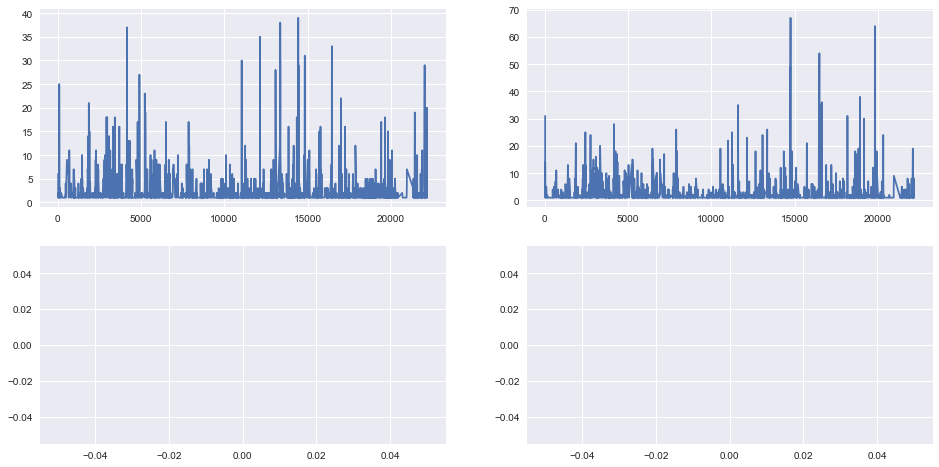

In [114]:
#plt.plot(shop0_date0_cnt_month.item_id , shop0_date0_cnt_month.item_cnt_day)
fig = plt.figure(figsize=(16,8))
fig.add_subplot(221)
plt.plot(shop0_date0_cnt_month.item_id , shop0_date0_cnt_month.item_cnt_day)
fig.add_subplot(222)
plt.plot(shopa_datea_cnt_month[0][1].item_id , shopa_datea_cnt_month[0][1].item_cnt_day)
fig.add_subplot(223)
plt.plot(shopa_datea_cnt_month[0][2].item_id , shopa_datea_cnt_month[0][2].item_cnt_day)
fig.add_subplot(224)
plt.plot(shopa_datea_cnt_month[0][3].item_id , shopa_datea_cnt_month[0][3].item_cnt_day)
#shop0_date0_cnt_month.plot('item_id' , 'item_cnt_day' , figsize=(16 , 10))

In [37]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [38]:
lasso = Lasso()
lasso.fit(train[['date_block_num' , 'shop_id' , 'item_id']] , train['item_cnt_day'])

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [26]:
result = lasso.predict(train_data.loc[len(train): , ['date_block_num' , 'shop_id' , 'item_id']])

In [27]:
from sklearn.metrics import mean_squared_error

In [44]:
for i in range(len(result)):
    temp = int(result[i])
    if result[i]-temp>0.5:
        result[i] = temp+1
    else:
        result[i] = temp

In [41]:
train_data.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day',
       'item_category_id'],
      dtype='object')

In [42]:
lasso.fit(train_data[['date_block_num', 'shop_id' , 'item_id']] , train_data.item_cnt_day)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [47]:
test_data = pd.read_csv('test.csv')
test_data['date_block_num'] = 34

result = lasso.predict(test_data[['date_block_num' , 'shop_id' , 'item_id']])

In [45]:
result

array([1., 1., 1., ..., 1., 1., 1.])

In [48]:
np.max(result)

1.3248700958134112